In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

In [37]:
df=pd.read_csv('FastagFraudDetection[1].csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


### DATA PREPARATION

In [38]:
df.drop(['FastagID','Transaction_ID','Vehicle_Plate_Number'], axis=1, inplace=True)
df

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud
...,...,...,...,...,...,...,...,...,...,...
4995,1/1/2023 22:18,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud
4996,1/17/2023 13:43,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud
4997,2/5/2023 5:08,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud
4998,2/20/2023 20:34,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud


In [39]:
df.head()

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


In [40]:
df['Timestamp_date']=pd.to_datetime(df['Timestamp']).dt.day
df['Timestamp_month']=pd.to_datetime(df['Timestamp']).dt.month
df['Timestamp_year']=pd.to_datetime(df['Timestamp']).dt.year

In [41]:
df

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Timestamp_date,Timestamp_month,Timestamp_year
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,6,1,2023
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,7,1,2023
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,8,1,2023
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,9,1,2023
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,10,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1/1/2023 22:18,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud,1,1,2023
4996,1/17/2023 13:43,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud,17,1,2023
4997,2/5/2023 5:08,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud,5,2,2023
4998,2/20/2023 20:34,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud,20,2,2023


In [42]:
df[['Latitude', 'Longitude']] = df['Geographical_Location'].str.split(',', expand=True)

In [158]:
df.drop('Geographical_Location',axis=1, inplace=True)

In [43]:
df['Latitude']

0       13.059816123454882
1       13.059816123454882
2       13.059816123454882
3       13.059816123454882
4       13.059816123454882
               ...        
4995     13.21331620748757
4996     13.21331620748757
4997     13.21331620748757
4998     13.21331620748757
4999     13.21331620748757
Name: Latitude, Length: 5000, dtype: object

In [44]:
df['Longitude']

0        77.77068662374292
1        77.77068662374292
2        77.77068662374292
3        77.77068662374292
4        77.77068662374292
               ...        
4995     77.55413526894684
4996     77.55413526894684
4997     77.55413526894684
4998     77.55413526894684
4999     77.55413526894684
Name: Longitude, Length: 5000, dtype: object

In [45]:
df['Longitude']=pd.to_numeric(df['Longitude'])
df['Latitude']=pd.to_numeric(df['Latitude'])

In [47]:
df.drop('Timestamp',axis=1,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vehicle_Type           5000 non-null   object 
 1   TollBoothID            5000 non-null   object 
 2   Lane_Type              5000 non-null   object 
 3   Vehicle_Dimensions     5000 non-null   object 
 4   Transaction_Amount     5000 non-null   int64  
 5   Amount_paid            5000 non-null   int64  
 6   Geographical_Location  5000 non-null   object 
 7   Vehicle_Speed          5000 non-null   int64  
 8   Fraud_indicator        5000 non-null   object 
 9   Timestamp_date         5000 non-null   int64  
 10  Timestamp_month        5000 non-null   int64  
 11  Timestamp_year         5000 non-null   int64  
 12  Latitude               5000 non-null   float64
 13  Longitude              5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ 

In [49]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(include='object')

In [50]:
cat

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Fraud_indicator
0,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292",Fraud
1,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",Fraud
2,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",Not Fraud
3,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",Fraud
4,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292",Fraud
...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,"13.21331620748757, 77.55413526894684",Not Fraud
4996,Van,B-102,Express,Medium,"13.21331620748757, 77.55413526894684",Not Fraud
4997,Sedan,A-101,Regular,Medium,"13.21331620748757, 77.55413526894684",Not Fraud
4998,SUV,B-102,Express,Large,"13.21331620748757, 77.55413526894684",Not Fraud


In [51]:
cat_cols=[item for item in df.columns if df[item].dtype=='object']
cat_cols

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'Fraud_indicator']

In [52]:
for item in cat_cols:
    print(item)
    print(f'{df[item].value_counts()}')
    print('\n')

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64


TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: TollBoothID, dtype: int64


Lane_Type
Regular    2858
Express    2142
Name: Lane_Type, dtype: int64


Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: Vehicle_Dimensions, dtype: int64


Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: Geographical_Location, dtype: int64


Fraud_indicator
Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64




In [53]:
df['Fraud_indicator'].value_counts()/len(df)*100

Not Fraud    80.34
Fraud        19.66
Name: Fraud_indicator, dtype: float64

In [54]:
df

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Timestamp_date,Timestamp_month,Timestamp_year,Latitude,Longitude
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,6,1,2023,13.059816,77.770687
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,7,1,2023,13.059816,77.770687
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,8,1,2023,13.059816,77.770687
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,9,1,2023,13.059816,77.770687
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,10,1,2023,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud,1,1,2023,13.213316,77.554135
4996,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud,17,1,2023,13.213316,77.554135
4997,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud,5,2,2023,13.213316,77.554135
4998,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud,20,2,2023,13.213316,77.554135


In [55]:
df['Fraud_indicator']=df['Fraud_indicator'].map({'Fraud':1,'Not Fraud':0})

### EDA

In [64]:
df.describe()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Timestamp_date,Timestamp_month,Timestamp_year,Latitude,Longitude
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000
mean,161.06200,141.261000,67.851200,0.196600,15.756200,5.892200,2023.0,13.018891,77.601448
std,112.44995,106.480996,16.597547,0.397467,8.783382,3.437636,0.0,0.124990,0.106866
min,0.00000,0.000000,10.000000,0.000000,1.000000,1.000000,2023.0,12.841977,77.475801
25%,100.00000,90.000000,54.000000,0.000000,8.000000,3.000000,2023.0,12.936687,77.531140
50%,130.00000,120.000000,67.000000,0.000000,16.000000,6.000000,2023.0,13.042661,77.554135
75%,290.00000,160.000000,82.000000,0.000000,23.000000,9.000000,2023.0,13.059816,77.675475
max,350.00000,350.000000,118.000000,1.000000,31.000000,12.000000,2023.0,13.213316,77.770687


In [68]:
cat

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Fraud_indicator
0,Bus,A-101,Express,Large,Fraud
1,Car,B-102,Regular,Small,Fraud
2,Motorcycle,D-104,Regular,Small,Not Fraud
3,Truck,C-103,Regular,Large,Fraud
4,Van,B-102,Express,Medium,Fraud
...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,Not Fraud
4996,Van,B-102,Express,Medium,Not Fraud
4997,Sedan,A-101,Regular,Medium,Not Fraud
4998,SUV,B-102,Express,Large,Not Fraud


<AxesSubplot:xlabel='Vehicle_Type', ylabel='count'>

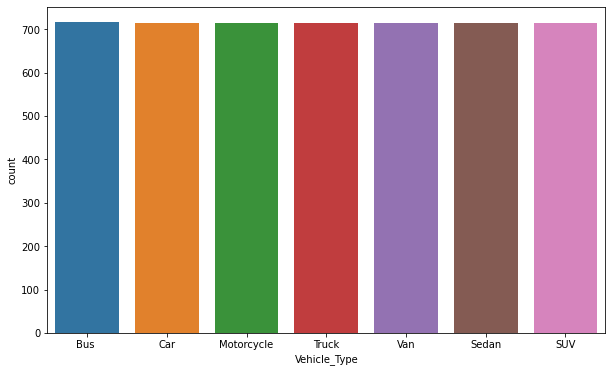

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(cat['Vehicle_Type'])

<AxesSubplot:xlabel='TollBoothID', ylabel='count'>

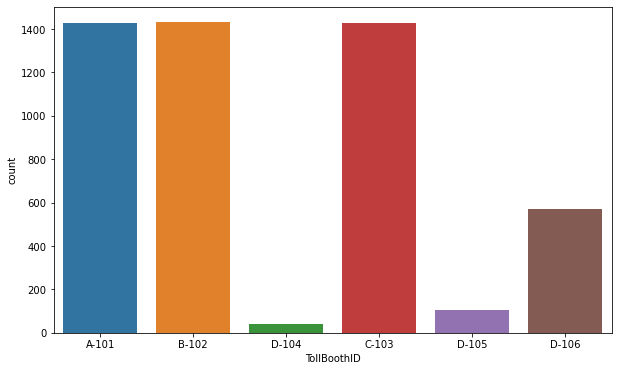

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(cat['TollBoothID'])

<AxesSubplot:xlabel='Vehicle_Dimensions', ylabel='count'>

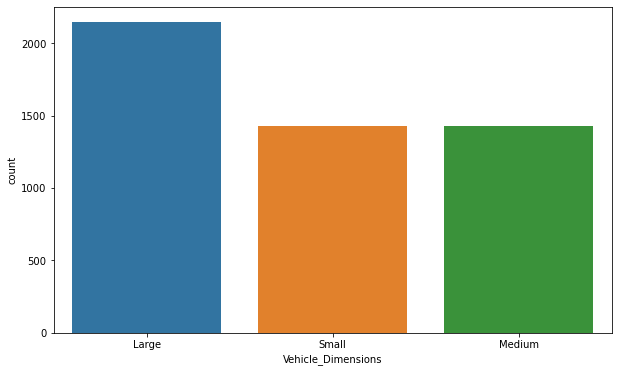

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(cat['Vehicle_Dimensions'])

<AxesSubplot:xlabel='Fraud_indicator', ylabel='count'>

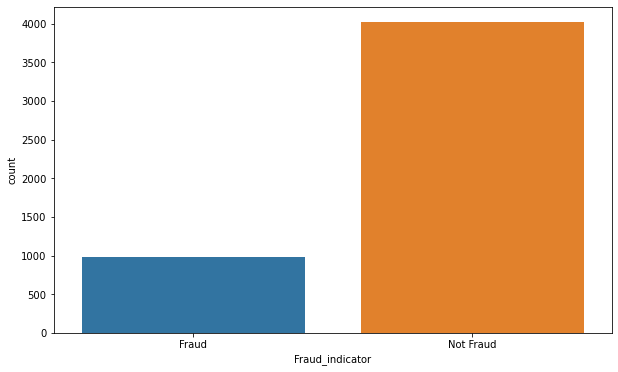

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(cat['Fraud_indicator'])

### Insights :
1.Most number of ravells have passed through toll booth 101, 102, 103</br>
2.Vehicle with high dimensions or large vehicles have used the tolls

<AxesSubplot:ylabel='Fraud_indicator'>

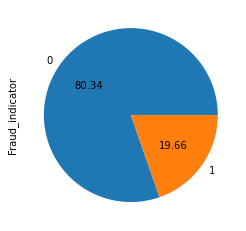

In [77]:
df['Fraud_indicator'].value_counts().plot(kind='pie',autopct='%.2f')

In [84]:
num

,Transaction_Amount,Amount_paid,Vehicle_Speed,Timestamp_date
0,350,120,65,6
1,120,100,78,7
2,0,0,53,8
3,350,120,92,9
4,140,100,60,10
...,...,...,...,...
4995,330,330,81,1
4996,125,125,64,17
4997,115,115,93,5
4998,145,145,57,20


(array([ 714.,  142.,  572., 1286.,  714.,  142.,    0.,    0.,  572.,
         858.]),
 array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.]),
 <BarContainer object of 10 artists>)

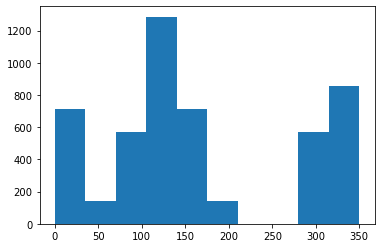

In [91]:
plt.hist(df['Transaction_Amount'])

(array([   4.,   36.,  104., 1048.,  978.,  908.,  998.,  810.,  110.,
           4.]),
 array([ 10. ,  20.8,  31.6,  42.4,  53.2,  64. ,  74.8,  85.6,  96.4,
        107.2, 118. ]),
 <BarContainer object of 10 artists>)

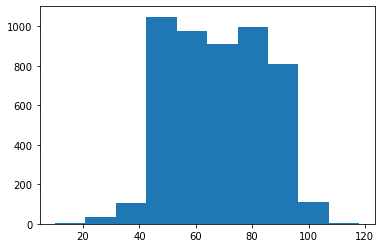

In [95]:
plt.hist(df['Vehicle_Speed'],bins=10)

(array([ 788.,  208., 1024., 1185.,  596.,  104.,    0.,    0.,  448.,
         647.]),
 array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.]),
 <BarContainer object of 10 artists>)

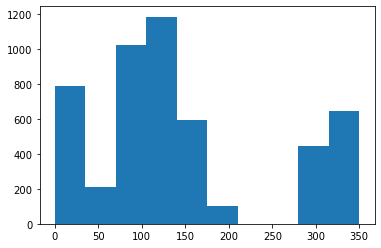

In [88]:
plt.hist(df['Amount_paid'])

In [120]:
def dist_plot(df,col):
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.title(f'Dist plot for {col}')

In [113]:
num_cols=['Transaction_Amount',
 'Amount_paid',
 'Vehicle_Speed']


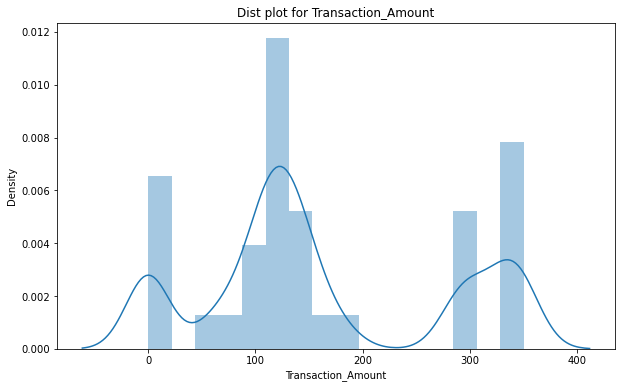

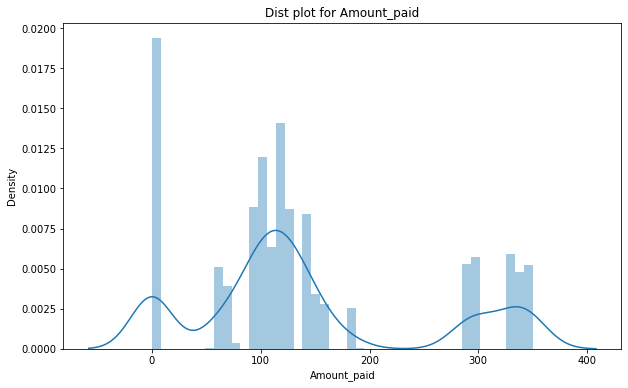

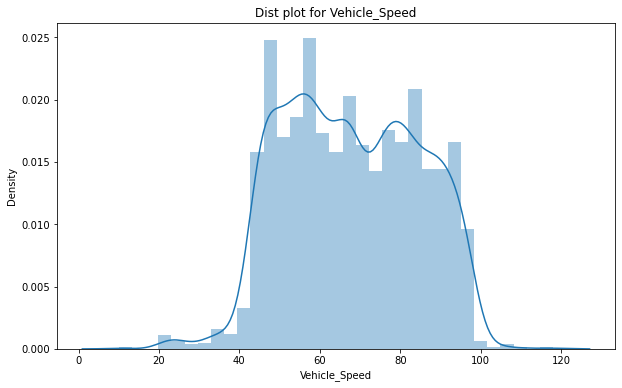

In [121]:
for item in num_cols:
    dist_plot(num, item)

In [118]:
def box_plot(df,col):
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])
    plt.title(f'Box plot for {col}')

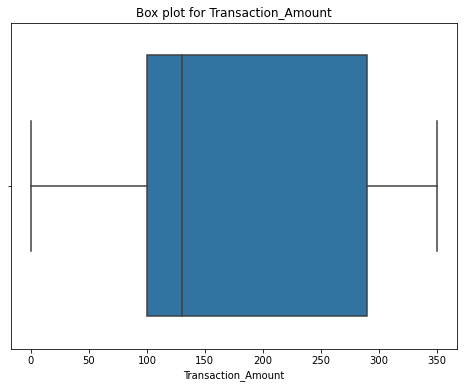

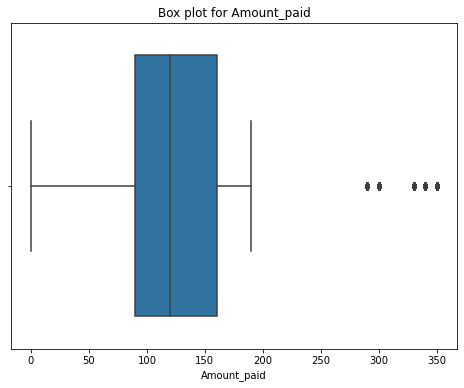

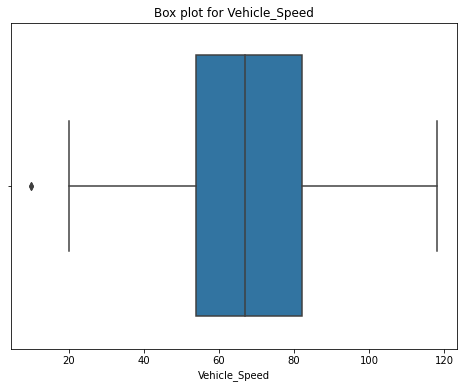

In [119]:
for item in num_cols:
    box_plot(num, item)

<AxesSubplot:xlabel='TollBoothID', ylabel='Transaction_Amount'>

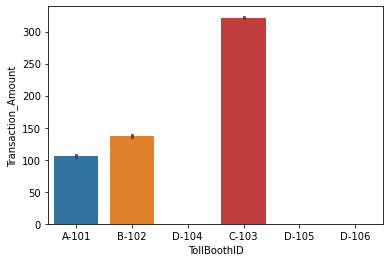

In [127]:
sns.barplot(df['TollBoothID'],df['Transaction_Amount'])

<AxesSubplot:xlabel='Lane_Type', ylabel='Transaction_Amount'>

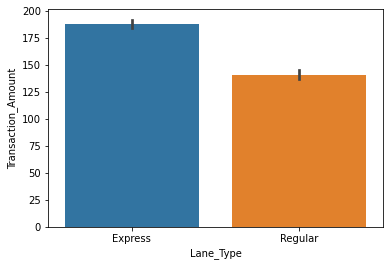

In [129]:
sns.barplot(df['Lane_Type'],df['Transaction_Amount'])

<AxesSubplot:xlabel='Vehicle_Dimensions', ylabel='Transaction_Amount'>

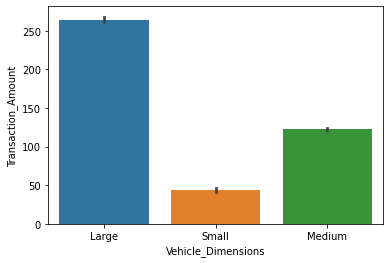

In [130]:
sns.barplot(df['Vehicle_Dimensions'],df['Transaction_Amount'])

<AxesSubplot:xlabel='Vehicle_Type', ylabel='Transaction_Amount'>

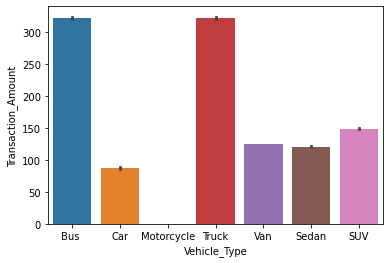

In [132]:
sns.barplot(df['Vehicle_Type'],df['Transaction_Amount'])

<AxesSubplot:xlabel='Vehicle_Dimensions', ylabel='Transaction_Amount'>

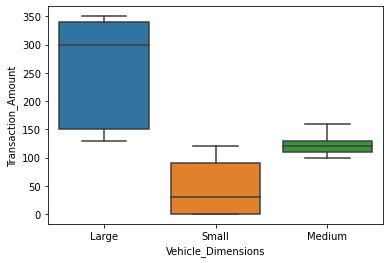

In [133]:
sns.boxplot(df['Vehicle_Dimensions'],df['Transaction_Amount'])

In [136]:
df

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Timestamp_month,Timestamp_year,Latitude,Longitude
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,1,1,2023,13.059816,77.770687
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,1,1,2023,13.059816,77.770687
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,0,1,2023,13.059816,77.770687
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,1,1,2023,13.059816,77.770687
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,1,1,2023,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,0,1,2023,13.213316,77.554135
4996,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,0,1,2023,13.213316,77.554135
4997,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,0,2,2023,13.213316,77.554135
4998,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,0,2,2023,13.213316,77.554135


In [144]:
pd.crosstab(df['Lane_Type'],df['Fraud_indicator'])

Fraud_indicator,0,1
Lane_Type,,
Express,1652,490
Regular,2365,493


<AxesSubplot:xlabel='Fraud_indicator', ylabel='Lane_Type'>

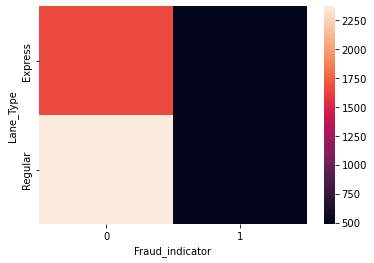

In [147]:
sns.heatmap(pd.crosstab(df['Lane_Type'],df['Fraud_indicator']))

In [148]:
pd.crosstab(df['Vehicle_Dimensions'],df['Fraud_indicator'])

Fraud_indicator,0,1
Vehicle_Dimensions,,
Large,1625,519
Medium,1086,342
Small,1306,122


<AxesSubplot:xlabel='Fraud_indicator', ylabel='Vehicle_Dimensions'>

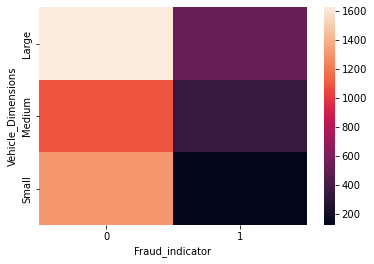

In [149]:
sns.heatmap(pd.crosstab(df['Vehicle_Dimensions'],df['Fraud_indicator']))

In [150]:
corr=df.corr()

<AxesSubplot:>

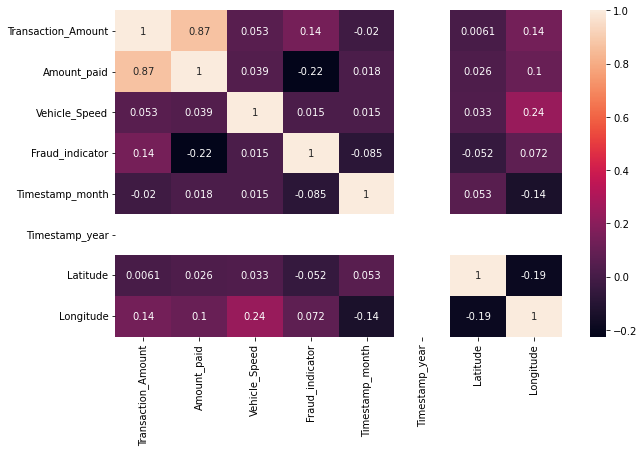

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [159]:
df

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Timestamp_month,Timestamp_year,Latitude,Longitude
0,Bus,A-101,Express,Large,350,120,65,1,1,2023,13.059816,77.770687
1,Car,B-102,Regular,Small,120,100,78,1,1,2023,13.059816,77.770687
2,Motorcycle,D-104,Regular,Small,0,0,53,0,1,2023,13.059816,77.770687
3,Truck,C-103,Regular,Large,350,120,92,1,1,2023,13.059816,77.770687
4,Van,B-102,Express,Medium,140,100,60,1,1,2023,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,330,330,81,0,1,2023,13.213316,77.554135
4996,Van,B-102,Express,Medium,125,125,64,0,1,2023,13.213316,77.554135
4997,Sedan,A-101,Regular,Medium,115,115,93,0,2,2023,13.213316,77.554135
4998,SUV,B-102,Express,Large,145,145,57,0,2,2023,13.213316,77.554135


In [160]:
df=pd.get_dummies(df,columns=['Vehicle_Type','TollBoothID','Lane_Type','Vehicle_Dimensions'],drop_first=True)

In [161]:
df

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Timestamp_month,Timestamp_year,Latitude,Longitude,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,350,120,65,1,1,2023,13.059816,77.770687,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120,100,78,1,1,2023,13.059816,77.770687,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,53,0,1,2023,13.059816,77.770687,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,350,120,92,1,1,2023,13.059816,77.770687,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,140,100,60,1,1,2023,13.059816,77.770687,0,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,81,0,1,2023,13.213316,77.554135,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4996,125,125,64,0,1,2023,13.213316,77.554135,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4997,115,115,93,0,2,2023,13.213316,77.554135,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4998,145,145,57,0,2,2023,13.213316,77.554135,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [164]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [165]:
var_thres.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [168]:
df.drop('Timestamp_year',axis=1, inplace=True)

<AxesSubplot:>

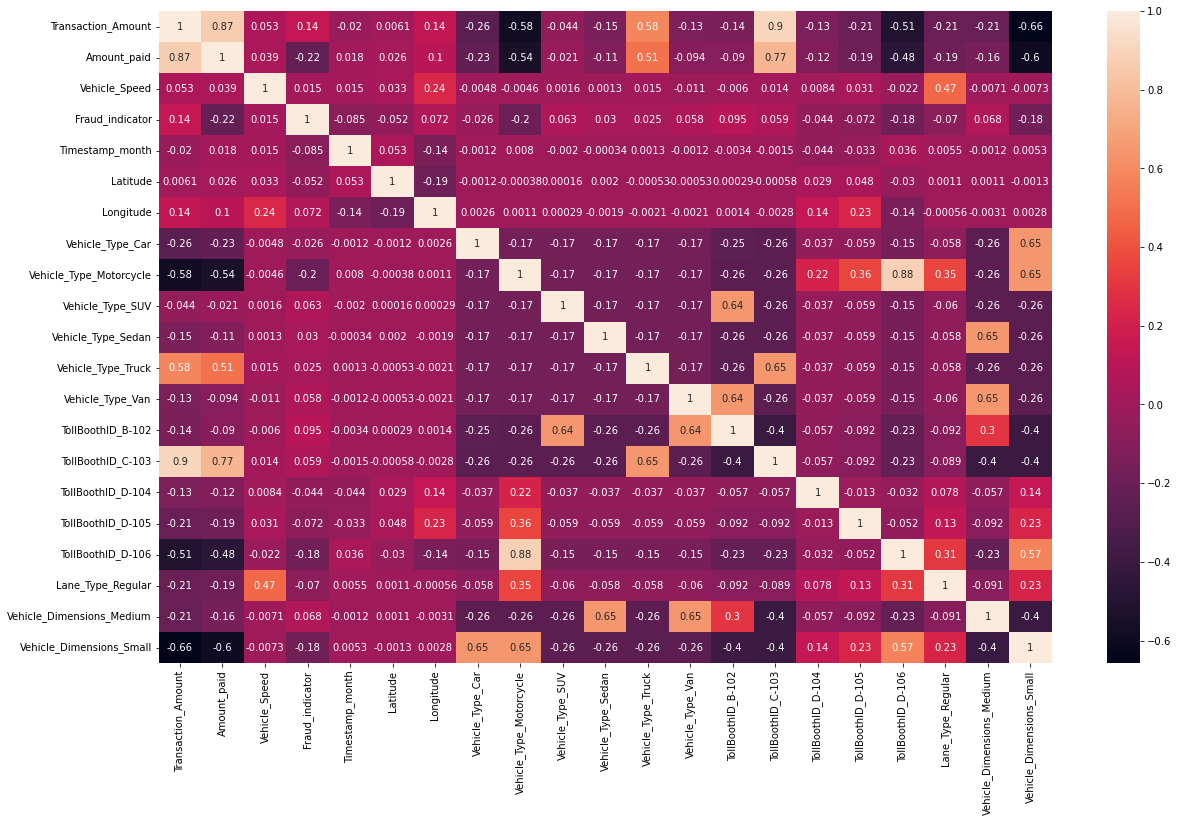

In [169]:
corr=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)

In [170]:
def correlation(df, threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [172]:
X=df.drop('Fraud_indicator',axis=1)
y=df['Fraud_indicator']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [176]:
corr_features=correlation(X_train, 0.8) 

In [177]:
corr_features

{'Amount_paid', 'TollBoothID_C-103', 'TollBoothID_D-106'}

In [178]:
from sklearn.preprocessing import StandardScaler

In [181]:
df['Amount_difference']=df['Transaction_Amount']-df['Amount_paid']

In [184]:
df

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Timestamp_month,Latitude,Longitude,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Amount_difference
0,350,120,65,1,1,13.059816,77.770687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230
1,120,100,78,1,1,13.059816,77.770687,1,0,0,0,0,0,1,0,0,0,0,1,0,1,20
2,0,0,53,0,1,13.059816,77.770687,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
3,350,120,92,1,1,13.059816,77.770687,0,0,0,0,1,0,0,1,0,0,0,1,0,0,230
4,140,100,60,1,1,13.059816,77.770687,0,0,0,0,0,1,1,0,0,0,0,0,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,81,0,1,13.213316,77.554135,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4996,125,125,64,0,1,13.213316,77.554135,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4997,115,115,93,0,2,13.213316,77.554135,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4998,145,145,57,0,2,13.213316,77.554135,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [193]:
df1

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Timestamp_month,Latitude,Longitude,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Amount_difference
0,350,120,65,1,1,13.059816,77.770687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230
1,120,100,78,1,1,13.059816,77.770687,1,0,0,0,0,0,1,0,0,0,0,1,0,1,20
2,0,0,53,0,1,13.059816,77.770687,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
3,350,120,92,1,1,13.059816,77.770687,0,0,0,0,1,0,0,1,0,0,0,1,0,0,230
4,140,100,60,1,1,13.059816,77.770687,0,0,0,0,0,1,1,0,0,0,0,0,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,81,0,1,13.213316,77.554135,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4996,125,125,64,0,1,13.213316,77.554135,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4997,115,115,93,0,2,13.213316,77.554135,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4998,145,145,57,0,2,13.213316,77.554135,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [194]:
df1=df1.drop('Amount_difference',axis=1)

In [196]:
from sklearn.model_selection import train_test_split
X=df1.drop('Fraud_indicator',axis=1)
y=df1['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [199]:
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [202]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [203]:
y_pred = model.predict(X_test)


In [204]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [205]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977


In [206]:
y_pred_train = model.predict(X_train)

y_pred_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [207]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9715


In [220]:
df2.drop(['Amount_paid','Amount_difference'],axis=1,inplace=True)

In [221]:
from sklearn.model_selection import train_test_split
X=df2.drop('Fraud_indicator',axis=1)
y=df2['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [222]:
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [223]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [224]:
y_pred = model.predict(X_test)

In [225]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.813


In [226]:
y_pred_train = model.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8010
